# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [6]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


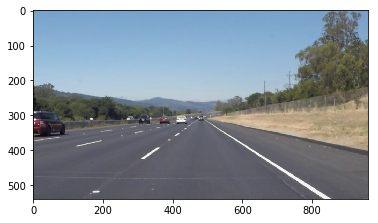

In [7]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [109]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    #for line in lines:
    #    for x1,y1,x2,y2 in line:
    #        cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    
    leftLines = []
    rightLines = []
    xLeftMean = 0
    yLeftMean = 0
    xRightMean = 0
    yRightMean = 0
    
    leftSlopes = []
    rightSlopes = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            if (slope) < 0:
                leftLines.append(line)
                leftSlopes.append(slope)
                xLeftMean = xLeftMean + x2 + x1
                yLeftMean = yLeftMean + y2 + y1
            if (slope) > 0:
                rightLines.append(line)
                rightSlopes.append(slope)
                xRightMean = xRightMean + x2 + x1
                yRightMean = yRightMean + y2 + y1
                
    xLeftMean = xLeftMean / (2 * len(leftLines))
    yLeftMean = yLeftMean / (2 * len(leftLines))
    
    xRightMean = xRightMean / (2 * len(rightLines))
    yRightMean = yRightMean / (2 * len(rightLines))
    
    leftSlopes.sort()
    rightSlopes.sort()
    #print(rightSlopes)
    leftSlope = leftSlopes[int(len(leftSlopes) / 2)]
    rightSlope = rightSlopes[int(len(rightSlopes) / 2)]
    #print(leftSlope, rightSlope)
    #print(xLeftMean, yLeftMean, xRightMean, yRightMean)
    leftBeta0 = -leftSlope * xLeftMean + yLeftMean
    rightBeta0 = -rightSlope * xRightMean + yRightMean
    #print(leftBeta0, rightBeta0)
    lineY1 = 539
    lineY2 = 0
    leftLineX1 = int((lineY1 - leftBeta0) / leftSlope)
    leftLineX2 = int((lineY2 - leftBeta0) / leftSlope)
    rightLineX1 = int((lineY1 - rightBeta0) / rightSlope)
    rightLineX2 = int((lineY2 - rightBeta0) / rightSlope)
    
    cv2.line(img, (leftLineX1, lineY1), (leftLineX2, lineY2), color, thickness)
    cv2.line(img, (rightLineX1, lineY1), (rightLineX2, lineY2), color, thickness)
    
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [9]:
import os
os.listdir("test_images/")

['whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowCurve.jpg',
 'solidYellowLeft.jpg',
 'solidWhiteRight.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

whiteCarLaneSwitch.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
solidWhiteCurve.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
solidYellowCurve2.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
solidYellowCurve.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
solidYellowLeft.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
solidWhiteRight.jpg  is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


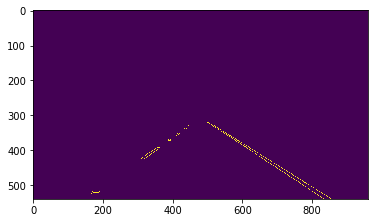

In [110]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.
for subdir, dirs, files in os.walk("test_images/"):
    for file in files:
        inputFile = os.path.join(subdir, file)
        image = mpimg.imread(inputFile)
        #printing out some stats and plotting
        print(file, ' is:', type(image), 'with dimensions:', image.shape)
        gray = grayscale(image)
        blurGray = gaussian_blur(gray, 3)
        edges = canny(blurGray, 50, 230)
        imshape = image.shape
        vertices = np.array([[(40,imshape[0]),(450, 320), (500, 320), (920, imshape[0])]], dtype=np.int32)
        maskedEdges = region_of_interest(edges, vertices)
        lineEdges = hough_lines(maskedEdges, rho=1, theta=np.pi/180, threshold=5, min_line_len=5, max_line_gap=1)
        weightedImage = weighted_img(lineEdges, image, α=0.8, β=1., γ=0.)
        outputFile = os.path.join("test_images_output/", file)
        outputFile1 = os.path.join("test_images_output/", "lineEdges" + file)
        cv2.imwrite(outputFile, weightedImage)
        cv2.imwrite(outputFile1, lineEdges)
        plt.imshow(maskedEdges)
        

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [105]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)
Downloading: 8192/28549024 bytes (0.0499712/28549024 bytes (1.81163264/28549024 bytes (4.1%1990656/28549024 bytes (7.0%2891776/28549024 bytes (10.13760128/28549024 bytes (13.24726784/28549024 bytes (16.65636096/28549024 bytes (19.76717440/28549024 bytes (23.57569408/28549024 bytes (26.58437760/28549024 bytes (29.69379840/28549024 bytes (32.910354688/28549024 bytes (36.3%11288576/28549024 bytes (39.5%12148736/28549024 bytes (42.6%13058048/28549024 bytes (45.7%14090240/28549024 bytes (49.4%15040512/28549024 bytes (52.7%16007168/28549024 bytes (56.1%16957440/28549024 bytes (59.4%17973248/28549024 bytes (63.0%18882560/28549024 bytes (66.1%19890176/28549024 bytes (69.7%20856832/28549024 bytes (73.1%21807104/28549024 bytes (76.4%22708224/28549024 bytes (79.5%23625728/28549024 bytes (82.8%24444928/28549024 byt

In [106]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    gray = grayscale(image)
    blurGray = gaussian_blur(gray, 3)
    edges = canny(blurGray, 50, 230)
    imshape = image.shape
    vertices = np.array([[(40,imshape[0]),(450, 320), (500, 320), (920, imshape[0])]], dtype=np.int32)
    maskedEdges = region_of_interest(edges, vertices)
    lineEdges = hough_lines(maskedEdges, rho=1, theta=np.pi/180, threshold=5, min_line_len=5, max_line_gap=1)
    result = weighted_img(lineEdges, image, α=0.8, β=1., γ=0.)
    return result

Let's try the one with the solid white lane on the right first ...

In [107]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[0.40000000000000002, 0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55000000000000004, 0.55555555555555558, 0.55555555555555558, 0.57692307692307687, 0.58333333333333337, 0.59842519685039375, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.61538461538461542, 0.61538461538461542, 0.625, 0.625, 0.63636363636363635, 0.63793103448275867, 0.6428571428571429, 0.64571428571428569, 0.69999999999999996, 0.69999999999999996]
-0.75 0.6
308.340909091 430.090909091 690.092592593 434.333333333
661.346590909 20.2777777778
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


  3%|▎         | 7/222 [00:00<00:03, 63.70it/s]

[0.40000000000000002, 0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55000000000000004, 0.55555555555555558, 0.55555555555555558, 0.57692307692307687, 0.58333333333333337, 0.59842519685039375, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.61538461538461542, 0.61538461538461542, 0.625, 0.625, 0.63636363636363635, 0.63793103448275867, 0.6428571428571429, 0.64571428571428569, 0.69999999999999996, 0.69999999999999996]
-0.75 0.6
308.340909091 430.090909091 690.092592593 434.333333333
661.346590909 20.2777777778
[0.59893048128342241, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.60280373831775702, 0.60504201680672265, 0.625, 0.63636363636363635, 0.64000000000000001, 0.6428571428571429, 0.6467065868263473, 0.66000000000000003, 0.66666666666666663, 0.69999999999999996, 0.75, 0.80000000000000004]
-0.764705882353 0.64
294.736842105 437.447368421 653.5 413.4375
662.834365325 -4.8025
[0.5625, 0.5625, 0.5714285714285714, 0.5714285714285714

  7%|▋         | 16/222 [00:00<00:03, 68.13it/s]

[0.5, 0.5, 0.5, 0.5, 0.53333333333333333, 0.55000000000000004, 0.5625, 0.5625, 0.56521739130434778, 0.5714285714285714, 0.5714285714285714, 0.58333333333333337, 0.58695652173913049, 0.59523809523809523, 0.59999999999999998, 0.6029411764705882, 0.60465116279069764, 0.60784313725490191, 0.6097560975609756, 0.61290322580645162, 0.625, 0.62650602409638556, 0.62727272727272732, 0.62962962962962965, 0.63157894736842102, 0.63636363636363635, 0.66666666666666663, 0.66666666666666663]
-0.705882352941 0.6
357.615384615 395.038461538 677.589285714 430.428571429
647.472850679 23.875
[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55555555555555558, 0.5714285714285714, 0.5714285714285714, 0.58620689655172409, 0.58823529411764708, 0.58823529411764708, 0.58823529411764708, 0.59259259259259256, 0.59999999999999998, 0.59999999999999998, 0.61428571428571432, 0.61538461

 11%|█▏        | 25/222 [00:00<00:02, 72.20it/s]

[0.5, 0.5, 0.5, 0.5, 0.5, 0.55555555555555558, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.58974358974358976, 0.59375, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.6071428571428571, 0.61538461538461542, 0.625, 0.625, 0.625, 0.62790697674418605, 0.63043478260869568, 0.63829787234042556, 0.65306122448979587, 0.65384615384615385, 0.65625, 0.68000000000000005, 0.69230769230769229, 0.7142857142857143, 0.77777777777777779, 0.80000000000000004]
-0.666666666667 0.607142857143
323.833333333 412.083333333 709.078125 448.265625
627.972222222 17.75390625
[0.5, 0.58333333333333337, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.60869565217391308, 0.61538461538461542, 0.62295081967213117, 0.62692307692307692, 0.63043478260869568, 0.63157894736842102, 0.63636363636363635, 0.64761904761904765, 0.65000000000000002, 0.66666666666666663, 0.67441860465116277]
-0.740740740741 0.626923076923
392.388888889 363.6

 19%|█▉        | 43/222 [00:00<00:02, 78.76it/s]

[0.5, 0.5, 0.54545454545454541, 0.5625, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.58333333333333337, 0.59090909090909094, 0.59999999999999998, 0.59999999999999998, 0.6071428571428571, 0.61290322580645162, 0.61538461538461542, 0.61904761904761907, 0.62396694214876036, 0.625, 0.62666666666666671, 0.62903225806451613, 0.63636363636363635, 0.65217391304347827, 0.66942148760330578, 0.6875, 0.69230769230769229]
-0.666666666667 0.607142857143
348.714285714 398.714285714 697.788461538 447.788461538
631.19047619 24.1311813187
[0.5714285714285714, 0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.60869565217391308, 0.61538461538461542, 0.61538461538461542, 0.6216216216216216, 0.6244343891402715, 0.625, 0.625, 0.62903225806451613, 0.63013698630136983, 0.63414634146341464, 0.63636363636363635, 0.66666666666666663, 0.66666666666666663, 0.67073170731707321, 0.69999999999999996]
-0.714285714286 0.625
335.647058824 408.97058823

 23%|██▎       | 50/222 [00:00<00:02, 63.81it/s]

[0.5714285714285714, 0.58333333333333337, 0.61290322580645162, 0.625, 0.625, 0.62686567164179108, 0.62777777777777777, 0.62790697674418605, 0.6428571428571429, 0.66666666666666663, 0.67241379310344829, 0.67441860465116277, 0.67567567567567566, 0.68181818181818177, 0.68181818181818177]
-0.692307692308 0.627906976744
334.75 406.625 667.033333333 425.633333333
638.375 6.7984496124
[0.42857142857142855, 0.5, 0.5, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.640625, 0.6428571428571429, 0.64539007092198586, 0.64864864864864868, 0.64912280701754388, 0.65714285714285714, 0.66666666666666663, 0.67322834645669294, 0.68181818181818177, 0.69230769230769229, 0.69999999999999996, 0.70588235294117652, 0.75, 0.75, 0.75, 0.80000000000000004, 0.83333333333333337]
-0.714285714286 0.657142857143
329.416666667 411.083333333 704.208333333 448.8125
646.380952381 -13.9529761905
[0.5, 0.5, 0.53333333333333333, 0.55000000000000004, 0.55555555555555558, 0.5625, 0.571428571

 26%|██▌       | 57/222 [00:00<00:02, 64.57it/s]

[0.5, 0.55555555555555558, 0.5625, 0.58333333333333337, 0.58620689655172409, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.62068965517241381, 0.625, 0.625, 0.63043478260869568, 0.63043478260869568, 0.63265306122448983, 0.64000000000000001, 0.6428571428571429, 0.64516129032258063, 0.6470588235294118, 0.6495726495726496, 0.65625, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67368421052631577]
-0.666666666667 0.630434782609
376.136363636 374.363636364 680.403846154 435.115384615
625.121212121 6.16513377926
[0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.61538461538461542, 0.61538461538461542, 0.62244897959183676, 0.62352941176470589, 0.6333333333333333, 0.63636363636363635, 0.63888888888888884, 0.65000000000000002, 0.65217391304347827, 0.65289256198347112, 0.666666666

 29%|██▉       | 64/222 [00:00<00:02, 61.35it/s]

[0.5, 0.5714285714285714, 0.58620689655172409, 0.59999999999999998, 0.625, 0.64583333333333337, 0.64864864864864868, 0.65517241379310343, 0.65853658536585369, 0.65957446808510634, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67307692307692313, 0.67465753424657537, 0.67500000000000004, 0.69230769230769229, 0.69999999999999996]
-0.708333333333 0.659574468085
320.211538462 416.307692308 670.131578947 430.236842105
643.124198718 -11.764837626
[0.40000000000000002, 0.5, 0.55555555555555558, 0.5625, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.58333333333333337, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.60869565217391308, 0.6333333333333333, 0.6333333333333333, 0.63636363636363635, 0.64000000000000001, 0.64406779661016944, 0.64583333333333337, 0.6470588235294118, 0.65289256198347112, 0.66000000000000003, 0.66666666666666663, 0.66666666666666663, 0.66

 32%|███▏      | 71/222 [00:01<00:02, 60.62it/s]

[0.5714285714285714, 0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.61538461538461542, 0.62631578947368416, 0.62857142857142856, 0.63636363636363635, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67333333333333334, 0.68000000000000005, 0.7142857142857143, 0.7142857142857143, 0.75, 0.78947368421052633, 0.81818181818181823]
-0.583333333333 0.666666666667
371.117647059 376.705882353 663.547619048 425.333333333
593.191176471 -17.0317460317
[0.066666666666666666, 0.5, 0.5, 0.55555555555555558, 0.55555555555555558, 0.5714285714285714, 0.57894736842105265, 0.58333333333333337, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.6243386243386243, 0.625, 0.62745098039215685, 0.63157894736842102, 0.63157894736842102, 0.63636363636363635, 0.6428571428571429, 0.65789473684210531, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.6

 35%|███▌      | 78/222 [00:01<00:02, 60.10it/s]

[0.10000000000000001, 0.53846153846153844, 0.55555555555555558, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.61904761904761907, 0.62857142857142856, 0.63636363636363635, 0.63636363636363635, 0.63636363636363635, 0.64102564102564108, 0.6428571428571429, 0.6428571428571429, 0.64550264550264547, 0.65384615384615385, 0.65714285714285714, 0.66666666666666663, 0.66666666666666663, 0.67586206896551726, 0.67647058823529416, 0.67924528301886788, 0.69230769230769229, 0.69999999999999996, 0.7142857142857143]
-0.653333333333 0.642857142857
334.184210526 402.078947368 633.25 421.730769231
620.412631579 14.6414835165
[0.058823529411764705, 0.5714285714285714, 0.59999999999999998, 0.64583333333333337, 0.64804469273743015, 0.6484375, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67426710097719866, 0.67741935483870963, 0.68000000000000005, 0.68181818181818177, 0.68421052631578949, 0.7142857142857143, 0.7142857142857143]
-0.630434782609 0.666666

 38%|███▊      | 84/222 [00:01<00:02, 59.32it/s]

[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.625, 0.63636363636363635, 0.63636363636363635, 0.6428571428571429, 0.64948453608247425, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.68000000000000005, 0.69444444444444442, 0.69565217391304346, 0.69856459330143539, 0.69999999999999996, 0.70370370370370372, 0.7142857142857143, 0.72222222222222221, 0.80000000000000004]
-0.7 0.666666666667
353.055555556 386.805555556 624.6875 404.020833333
633.944444444 -12.4375
[0.40000000000000002, 0.5, 0.5, 0.55555555555555558, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.625, 0.63636363636363635, 0.63636363636363635, 0.65789473684210531, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66935483870967738, 0.67032967032967028, 0.68181818181818177, 0.6875, 0.6875, 0.6875, 0.68965517241379315, 0.69230769230769229, 0.69999999999999996, 0.6999999999999999

 41%|████      | 91/222 [00:01<00:02, 61.71it/s]

[0.5, 0.5714285714285714, 0.59999999999999998, 0.61538461538461542, 0.625, 0.625, 0.63636363636363635, 0.63636363636363635, 0.65217391304347827, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.68571428571428572, 0.70279720279720281, 0.70370370370370372, 0.70588235294117652, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.75]
-0.6 0.666666666667
292.25 426.25 640.318181818 413.181818182
601.6 -13.696969697
[0.5, 0.55555555555555558, 0.59999999999999998, 0.59999999999999998, 0.625, 0.6428571428571429, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.69444444444444442, 0.69444444444444442, 0.69565217391304346, 0.70034843205574915, 0.7009345794392523, 0.70370370370370372, 0.70967741935483875, 0.7142857142857143, 0.7142857142857143, 0.75, 0.77777777777777779, 0.80000000000000004, 0.80000000000000004]
-0.625 0.694444444444
265.722222222 445.148148148 655.5 422.434782609
611.224537037 -

 44%|████▍     | 98/222 [00:01<00:02, 59.86it/s]

[0.090909090909090912, 0.5, 0.5, 0.55555555555555558, 0.5714285714285714, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.625, 0.625, 0.625, 0.625, 0.63636363636363635, 0.65000000000000002, 0.66666666666666663, 0.66666666666666663, 0.67716535433070868, 0.6785714285714286, 0.72727272727272729, 0.73333333333333328, 0.75, 0.75, 0.75, 0.75, 0.76923076923076927, 0.76923076923076927, 0.77272727272727271, 0.77777777777777779, 0.80000000000000004, 0.80000000000000004, 0.80000000000000004, 0.80000000000000004, 0.80000000000000004, 0.8125, 0.83333333333333337, 0.8571428571428571, 0.8571428571428571, 0.875, 0.88888888888888884, 1.0, 1.0]
-0.644444444444 0.75
289.022727273 432.0 668.833333333 444.619047619
618.259090909 -57.005952381
[0.5, 0.5, 0.5, 0.5, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.6333333333333333, 0.6333333333333333, 0.63636363636363635, 0.6

 47%|████▋     | 105/222 [00:01<00:01, 60.62it/s]

[0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67261904761904767, 0.6785714285714286, 0.6785714285714286, 0.6875, 0.69565217391304346, 0.6966292134831461, 0.7009345794392523, 0.70370370370370372, 0.70967741935483875, 0.7142857142857143, 0.71875, 0.75]
-0.6875 0.695652173913
366.541666667 382.916666667 682.875 440.59375
634.9140625 -34.4497282609
[0.5, 0.65517241379310343, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.69444444444444442, 0.69444444444444442, 0.69565217391304346, 0.69999999999999996, 0.7009345794392523, 0.7010309278350515, 0.7021276595744681, 0.70588235294117652, 0.7142857142857143, 0.7142857142857143, 0.72222222222222221, 0.75, 0.75, 0.75, 0.75, 0.80000000000000004, 0.8571428571428571]
-0.727272727273 0.701030927835
356.941176471 389.647058824 692.1875 444.25
649.240641711 -40.9948453608
[0.5, 0.5, 0.5625, 0.5714285714285714, 0.58333333333333337, 0.59999999999999998, 0.59

 50%|█████     | 112/222 [00:01<00:01, 57.61it/s]

[0.58333333333333337, 0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.61538461538461542, 0.63636363636363635, 0.63636363636363635, 0.6428571428571429, 0.6428571428571429, 0.66666666666666663, 0.67251461988304095, 0.68181818181818177, 0.68253968253968256, 0.68421052631578949, 0.68518518518518523, 0.69230769230769229, 0.69230769230769229, 0.69230769230769229, 0.70833333333333337, 0.7142857142857143, 0.71875, 0.72093023255813948, 0.73333333333333328, 0.75, 0.75, 0.77777777777777779, 0.80000000000000004, 0.80000000000000004, 0.83333333333333337, 0.875]
-0.666666666667 0.685185185185
275.704545455 445.022727273 659.453125 423.859375
628.825757576 -27.9881365741
[0.5714285714285714, 0.5714285714285714, 0.58333333333333337, 0.59999999999999998, 0.625, 0.625, 0.63636363636363635, 0.66666666666666663, 0.67307692307692313, 0.67322834645669294, 0.69230769230769229, 0.69230769230769229, 0.69230769230769229, 0.70588235294117652, 0.705882352

 54%|█████▎    | 119/222 [00:01<00:01, 59.67it/s]

[0.40000000000000002, 0.5, 0.5714285714285714, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.61111111111111116, 0.62962962962962965, 0.63636363636363635, 0.64814814814814814, 0.64814814814814814, 0.66666666666666663, 0.66666666666666663, 0.6875, 0.6875, 0.69230769230769229, 0.69230769230769229, 0.69736842105263153, 0.71794871794871795, 0.72727272727272729, 0.75, 0.75, 0.75, 0.76923076923076927, 0.77777777777777779, 0.80000000000000004, 0.8571428571428571, 1.0, 1.0]
-0.666666666667 0.6875
359.861111111 387.305555556 688.741935484 439.677419355
627.212962963 -33.8326612903
[0.58823529411764708, 0.61290322580645162, 0.64739884393063585, 0.660377358490566, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67431192660550454, 0.67567567567567566, 0.67647058823529416, 0.6785714285714286, 0.75, 0.80000000000000004]
-0.666666666667 0.666666666667
347.617647059 396.823529412 664.785714286 424.35714285

 57%|█████▋    | 126/222 [00:01<00:01, 59.16it/s]

[0.125, 0.40000000000000002, 0.59999999999999998, 0.59999999999999998, 0.64000000000000001, 0.640625, 0.64429530201342278, 0.65217391304347827, 0.65384615384615385, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.67279411764705888, 0.67567567567567566, 0.68421052631578949, 0.68421052631578949, 0.6875, 0.69230769230769229, 0.70833333333333337, 0.7142857142857143, 0.7142857142857143, 0.77777777777777779, 0.80000000000000004]
-0.707317073171 0.666666666667
341.029411765 404.176470588 632.923076923 420.076923077
645.392395983 -1.87179487179
[0.40000000000000002, 0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5714285714285714, 0.5714285714285714, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.61904761904761907, 0.625, 0.625, 0.625, 0.62650602409638556, 0.62790697674418605, 0.63157894736842102, 0.63414634146341464, 0.63636363636363635, 0.6470588235294118, 0.

 59%|█████▉    | 132/222 [00:02<00:01, 58.94it/s]

[0.40000000000000002, 0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54545454545454541, 0.5714285714285714, 0.5714285714285714, 0.57692307692307687, 0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.6097560975609756, 0.61538461538461542, 0.61538461538461542, 0.61971830985915488, 0.62195121951219512, 0.625, 0.625, 0.62857142857142856, 0.63636363636363635, 0.64864864864864868, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.69999999999999996, 0.7142857142857143, 0.72727272727272729, 0.75, 0.75]
-0.688524590164 0.615384615385
397.0 373.964285714 730.823529412 462.705882353
647.308548009 12.9683257919
[0.33333333333333331, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.44444444444444442, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54545454545454541, 0.54545454545454541, 0.5454

 62%|██████▏   | 138/222 [00:02<00:01, 59.01it/s]

[0.5, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.60526315789473684, 0.625, 0.62962962962962965, 0.63414634146341464, 0.63636363636363635, 0.64000000000000001, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.64516129032258063, 0.64864864864864868, 0.64885496183206104, 0.65284974093264247, 0.65625, 0.65714285714285714, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.69999999999999996, 0.7142857142857143, 0.7142857142857143, 0.75, 0.75, 0.83333333333333337]
-0.75 0.645161290323
282.666666667 445.833333333 712.327586207 450.0
657.833333333 -9.56618464961
[0.16666666666666666, 0.53846153846153844, 0.5714285714285714, 0.5714285714285714, 0.57894736842105265, 0.59999999999999998, 0.62121212121212122, 0.625, 0.625, 0.625, 0.63043478260869568, 0.63157894736842102, 0.65137614678899081]
-0.722222222222 0.621212121212
317.26 421.38 658.961538462 440.615384615
650.512222222 31.2604895105
[0.62048192771084343, 0.625, 0.625, 0.

 65%|██████▍   | 144/222 [00:02<00:01, 58.22it/s]

[0.5714285714285714, 0.58333333333333337, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.6097560975609756, 0.61538461538461542, 0.61538461538461542, 0.61904761904761907, 0.62, 0.62213740458015265, 0.625, 0.62903225806451613, 0.63157894736842102, 0.63636363636363635, 0.65142857142857147, 0.65909090909090906, 0.66666666666666663, 0.66666666666666663]
-0.727272727273 0.619047619048
366.541666667 391.125 705.785714286 448.476190476
657.700757576 11.5612244898
[0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61538461538461542, 0.61538461538461542, 0.61904761904761907, 0.62459546925566345, 0.625, 0.625, 0.63043478260869568, 0.63157894736842102, 0.63235294117647056, 0.63636363636363635, 0.64824120603015079]
-0.75 0.6
359.1 396.9 70

 68%|██████▊   | 151/222 [00:02<00:01, 59.96it/s]

[0.40000000000000002, 0.44444444444444442, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54545454545454541, 0.55555555555555558, 0.5714285714285714, 0.58823529411764708, 0.59999999999999998, 0.60360360360360366, 0.60377358490566035, 0.60869565217391308, 0.6097560975609756, 0.61904761904761907, 0.625, 0.6428571428571429, 0.64835164835164838, 0.66176470588235292, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.68181818181818177, 0.69444444444444442, 0.77777777777777779, 0.80000000000000004, 0.80000000000000004]
-0.722222222222 0.609756097561
250.296296296 474.074074074 697.823529412 438.5
654.843621399 12.9978479197
[0.5, 0.5, 0.5, 0.5, 0.5, 0.55555555555555558, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.61971830985915488, 0.625, 0.625, 0.62857142857142856, 0.63636363636363635, 0.64000000000000001, 0.6470588235294118, 0.65853658536585369, 0.66666666666666663, 0.66666666666666

 71%|███████   | 158/222 [00:02<00:01, 59.64it/s]

[0.125, 0.33333333333333331, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.44444444444444442, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55000000000000004, 0.55555555555555558, 0.55555555555555558, 0.5625, 0.56521739130434778, 0.56666666666666665, 0.5714285714285714, 0.5714285714285714, 0.59259259259259256, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.62105263157894741, 0.625, 0.625, 0.625, 0.647887323943662, 0.64864864864864868, 0.65217391304347827, 0.65384615384615385, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.6785714285714286, 0.6875, 0.7142857142857143, 0.7142857142857143, 0.72727272727272729, 0.80000000000000004, 0.80000000000000004, 0.80000000000000004, 0.83333333333333337]
-0.75 0.6
350.078947368 402.526315789 701.855555556 445.522222222
665.085526316 24.4088888889
[0.42857142857142855, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5357142857142857, 0.53846153846153844, 0.54545454545454

 74%|███████▍  | 165/222 [00:02<00:00, 60.38it/s]

[0.5, 0.54545454545454541, 0.5714285714285714, 0.5714285714285714, 0.5977011494252874, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.60076045627376429, 0.61904761904761907, 0.63636363636363635, 0.63888888888888884, 0.64102564102564108, 0.64356435643564358, 0.65384615384615385, 0.66666666666666663]
-0.75 0.6
291.722222222 448.472222222 725.916666667 452.833333333
667.263888889 17.2833333333
[0.5, 0.57894736842105265, 0.59259259259259256, 0.59685863874345546, 0.59793814432989689, 0.59999999999999998, 0.59999999999999998, 0.60185185185185186, 0.62121212121212122, 0.6271186440677966, 0.62962962962962965, 0.66666666666666663, 0.7142857142857143]
-0.757575757576 0.6
337.5 413.023809524 653.0 405.769230769
668.705627706 13.9692307692
[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.5, 0.5, 0.5, 0.5, 0.51851851851851849, 0.52941176470588236, 0.56097560975609762, 0.56097560975609762, 0.57999999999999996, 0.58333333333

 80%|████████  | 178/222 [00:02<00:00, 58.20it/s]

[0.42857142857142855, 0.45454545454545453, 0.45454545454545453, 0.5, 0.5, 0.5, 0.5, 0.55555555555555558, 0.55882352941176472, 0.57608695652173914, 0.57680250783699061, 0.58333333333333337, 0.58823529411764708, 0.59999999999999998, 0.59999999999999998, 0.61290322580645162, 0.61702127659574468, 0.61904761904761907, 0.62264150943396224, 0.77777777777777779]
-0.785714285714 0.576802507837
281.59375 460.90625 741.4 463.425
682.158482143 35.7836206897
[0.5, 0.53333333333333333, 0.55555555555555558, 0.5641025641025641, 0.5641025641025641, 0.56521739130434778, 0.57512953367875652, 0.57692307692307687, 0.57943925233644855, 0.58108108108108103, 0.58181818181818179, 0.58333333333333337, 0.58490566037735847, 0.58823529411764708, 0.60377358490566035]
-0.8 0.576923076923
332.75 422.208333333 695.466666667 435.233333333
688.408333333 34.0025641026
[0.44444444444444442, 0.44444444444444442, 0.5, 0.5, 0.5, 0.5, 0.53333333333333333, 0.54545454545454541, 0.55555555555555558, 0.55932203389830504, 0.5625, 

 86%|████████▋ | 192/222 [00:03<00:00, 59.94it/s]

[0.40000000000000002, 0.42857142857142855, 0.44444444444444442, 0.44444444444444442, 0.45454545454545453, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.53125, 0.54838709677419351, 0.55555555555555558, 0.5714285714285714, 0.5714285714285714, 0.57425742574257421, 0.5757575757575758, 0.57861635220125784, 0.59999999999999998, 0.61931818181818177, 0.63414634146341464, 0.64000000000000001, 0.7142857142857143, 0.75]
-0.777777777778 0.548387096774
347.357142857 411.607142857 749.3 462.78
681.773809524 51.8735483871
[0.33333333333333331, 0.40000000000000002, 0.5, 0.57407407407407407, 0.57664233576642332, 0.57894736842105265, 0.58333333333333337, 0.58490566037735847, 0.59999999999999998, 0.6071428571428571, 0.60869565217391308, 0.61904761904761907, 0.61971830985915488, 0.61971830985915488, 0.6216216216216216, 0.625, 0.625, 0.62962962962962965, 0.66666666666666663]
-0.8 0.607142857143
416.6875 355.9375 720.815789474 444.0
689.2875 6.36184210526
[0.55555555555555558, 0.5714285714285714, 0.5770925110132159, 0.57

 93%|█████████▎| 206/222 [00:03<00:00, 61.27it/s]

[0.53846153846153844, 0.5625, 0.56578947368421051, 0.56666666666666665, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.57446808510638303, 0.57718120805369133, 0.58064516129032262, 0.59139784946236562, 0.59459459459459463, 0.59722222222222221, 0.59810126582278478, 0.59999999999999998, 0.66666666666666663]
-0.739130434783 0.577181208054
424.1875 351.375 673.03125 417.71875
664.904891304 29.2577600671
[0.42857142857142855, 0.46666666666666667, 0.5, 0.5, 0.5, 0.5, 0.5625, 0.5714285714285714, 0.5714285714285714, 0.57281553398058249, 0.57360406091370564, 0.57894736842105265, 0.58823529411764708, 0.58823529411764708, 0.59090909090909094, 0.5957446808510638, 0.59932659932659937, 0.59999999999999998, 0.59999999999999998, 0.60465116279069764, 0.6428571428571429, 0.66666666666666663]
-0.8 0.578947368421
413.75 358.55 688.818181818 425.772727273
689.55 26.9832535885
[0.5, 0.5, 0.5, 0.53846153846153844, 0.54545454545454541, 0.55555555555555558, 0.55681818181818177, 0.5588235294117647

 96%|█████████▌| 213/222 [00:03<00:00, 61.11it/s]

[0.5, 0.5, 0.55000000000000004, 0.55102040816326525, 0.55319148936170215, 0.55555555555555558, 0.55752212389380529, 0.5625, 0.5636363636363636, 0.5714285714285714, 0.57258064516129037, 0.57499999999999996, 0.58333333333333337, 0.58823529411764708, 0.59090909090909094, 0.61538461538461542, 0.66666666666666663]
-0.818181818182 0.563636363636
417.45 356.45 738.617647059 451.029411765
698.0 34.7176470588
[0.45000000000000001, 0.5, 0.5, 0.5357142857142857, 0.5357142857142857, 0.54761904761904767, 0.55000000000000004, 0.55172413793103448, 0.55172413793103448, 0.55555555555555558, 0.55598455598455598, 0.55855855855855852, 0.5714285714285714, 0.57635467980295563, 0.57894736842105265, 0.58620689655172409, 0.66666666666666663]
-0.8 0.551724137931
374.823529412 390.676470588 709.117647059 436.588235294
690.535294118 45.3509127789
[0.44444444444444442, 0.45454545454545453, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54166666666666663, 0.54285714285714282, 0.54629629629629628, 0.55290102389078499, 0.5600000000

100%|█████████▉| 221/222 [00:03<00:00, 62.21it/s]

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.53846153846153844, 0.54545454545454541, 0.54838709677419351, 0.55000000000000004, 0.55591054313099042, 0.5565610859728507, 0.56060606060606055, 0.56140350877192979, 0.5641025641025641, 0.57868020304568524]
-0.833333333333 0.548387096774
333.0 421.823529412 721.25 446.8125
699.323529412 51.2883064516
[0.5, 0.5, 0.53333333333333333, 0.53846153846153844, 0.54285714285714282, 0.54285714285714282, 0.54545454545454541, 0.54545454545454541, 0.54545454545454541, 0.55000000000000004, 0.55128205128205132, 0.55555555555555558, 0.56000000000000005, 0.5625, 0.56666666666666665, 0.56666666666666665, 0.5714285714285714, 0.5714285714285714, 0.57971014492753625, 0.58904109589041098, 0.66666666666666663]
-0.8 0.551282051282
335.956521739 420.782608696 736.880952381 454.714285714
689.547826087 48.485042735


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 6.66 s, sys: 508 ms, total: 7.17 s
Wall time: 4 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [108]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))